<a href="https://colab.research.google.com/github/srikanthpeddapalli/Text-Classification-of-Disaster-or-Not/blob/main/nlp_foundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2022-07-08 12:45:57--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.02s   

2022-07-08 12:45:58 (31.4 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-07-08 12:45:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-08 12:45:58 (66.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import unzip_data,plot_loss_curves,compare_historys,create_tensorboard_callback

In [ ]:
unzip_data("nlp_getting_started.zip")

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np


In [ ]:
train_df=pd.read_csv("/content/train.csv")
test_df=pd.read_csv("/content/test.csv")

In [ ]:
train_df.head(2)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1


In [ ]:
train_df["text"][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_shuffle_df=train_df.sample(frac=1,random_state=42)

In [ ]:
train_shuffle_df.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
import random
random_index=random.randint(0,len(train_shuffle_df)-5)
for row in train_shuffle_df[["text","target"]][random_index:random_index+5].itertuples():
  _,text,target=row
  print(f"Target:{target}","(real_disaster)"if target>0 else "(not_disater)")
  print(f"Text:\n{text}\n")
  print("-----\n")


Target:0 (not_disater)
Text:
(Also I dont think sewing thought a leather belt would work out that well lol)

-----

Target:0 (not_disater)
Text:
[Question] Is anybody else having this problem with the '7' circle in Epicentre? via /r/jailbreak http://t.co/48TPnmbJVG

-----

Target:0 (not_disater)
Text:
@God how come bugs haven't all drowned out of existence every time it rains?

-----

Target:0 (not_disater)
Text:
self harm// I'm so angry please tag your scars on tumblr jesus christ i dont wanna get triggered

-----

Target:1 (real_disaster)
Text:
Plains: Calif. Oil Spill Could be Larger than Estimated. http://t.co/CcvcTe3lCw

-----



In [ ]:
#spliting the data

In [ ]:
from sklearn.model_selection import train_test_split
train_sentences,val_sentences,train_labels,val_labels=train_test_split(train_shuffle_df["text"].to_numpy(),
                                                                       train_shuffle_df["target"].to_numpy(),
                                                                       test_size=0.2,
                                                                       random_state=42)

In [ ]:
len(train_shuffle_df)

7613

In [ ]:
len(train_sentences),len(val_sentences)

(6090, 1523)

In [ ]:
len(train_labels),len(val_labels)

(6090, 1523)

In [ ]:

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


In [ ]:
text_vector=TextVectorization(max_tokens=None,
                              standardize="lower_and_strip_punctuation",
                              split="whitespace",
                              ngrams=None,
                              output_mode="int",
                              output_sequence_length=None,
                              pad_to_max_tokens=False)
                              

In [ ]:
train_sentences[:10]

array(['Detonation fashionable mountaineering electronic watch water-resistant couples leisure tab\x89Û_ http://t.co/E61x9Y65QD http://t.co/OVLET0gDqm',
       "Men escape car engulfed in flames in Parley's Canyon crews investigating cause - http://t.co/tFan6qq2Ys http://t.co/rAkwWritPo",
       'I-77 Mile Marker 31 to 40 South Mooresville  Iredell Vehicle Accident Congestion at 8/6 1:18 PM',
       "#Greece's tax revenues collapse as debt crisis continues via @guardian #bailout http://t.co/cJvbQXw83s ^mp",
       'Be not afraid of sudden fear neither of the desolation of the wicked when it cometh. For the Lord shall be thy... http://t.co/bP597YDs2b',
       'Storm batters Auckland and Northland: A violent overnight storm has battered Auckland and Northland uprooting... http://t.co/enrPGRgtTs',
       "Benzema increasingly looks to be a casualty of Benitez's new look squad. Arsenal bound? 50-50 chance I think",
       'Acquire your postexistence straight a elevation in addition to uphe

In [ ]:
len(train_sentences[0].split())

11

In [ ]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
text_vector=TextVectorization(max_tokens=10000,
                              output_mode="int",
                              output_sequence_length=15)

In [ ]:
text_vector.adapt(train_sentences)
text_vector.adapt(val_sentences)

In [ ]:


sample_sentence="there is a diasater finded"
text_vector([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=array([[67,  9,  3,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])>

In [ ]:
random_sentence=random.choice(train_sentences)
print(f"original_text:{random_sentence}")
text_vector([random_sentence])

original_text:Shot Through The Heart XV: You are going to totally give love a bad name with this heart pierc http://t.co/xpFmR368uF http://t.co/ejdHvLKXAf


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 663,  250,    2,  575,    1,   12,   22,  153,    5, 1423,  720,
         103,    3,  508, 3881]])>

In [ ]:
random_sentence

'Shot Through The Heart XV: You are going to totally give love a bad name with this heart pierc http://t.co/xpFmR368uF http://t.co/ejdHvLKXAf'

In [ ]:
#get the vocabulary

In [ ]:
vocabulary=text_vector.get_vocabulary([train_sentences])

In [ ]:
vocabulary[:10]

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'i', 'and', 'is']

In [ ]:
#embedding

In [ ]:
from tensorflow.keras.layers import Embedding

In [ ]:
embedding=Embedding(input_dim=10000,
                    embeddings_initializer="uniform",
                    output_dim=64,
                    input_length=15)
                    
                  

In [ ]:
embedding

In [ ]:
random_sentence=random.choice(train_sentences)
print(f"original text:{random_sentence}\
          \n\nEmbedded version")
sample_embedd=embedding(text_vector([random_sentence]))
sample_embedd



original text:Fears over missing migrants in Med: Rescuers search for survivors after a boat carrying as many as 600 migrantsÛ_ http://t.co/IXfnE5Jlep          

Embedded version


<tf.Tensor: shape=(1, 15, 64), dtype=float32, numpy=
array([[[ 0.04640719, -0.01545659,  0.02544938,  0.01258738,
         -0.01189385, -0.03056029,  0.03259837,  0.03395266,
          0.0358942 , -0.01006863, -0.01290733, -0.03051522,
          0.04280518,  0.01156633,  0.02635579,  0.04918754,
          0.01300696,  0.01991019, -0.04397271,  0.04211089,
         -0.04758709,  0.04890629,  0.00130775, -0.03142319,
         -0.00274056,  0.00024177,  0.00559692,  0.03659148,
         -0.01516913,  0.04599777,  0.03412523,  0.04659541,
          0.00652315,  0.01587391, -0.02436559, -0.00812361,
          0.02570939, -0.00392742,  0.04067094,  0.03636645,
          0.03766998, -0.01885576, -0.02945805,  0.04684284,
         -0.04049002,  0.0080533 , -0.01482484,  0.00183929,
          0.04306931, -0.00436622,  0.03124373,  0.0255642 ,
         -0.04232844, -0.02543871,  0.04545644, -0.04077185,
          0.03693379,  0.04973879, -0.00521495,  0.02519435,
         -0.04285089,  0.0451851

In [ ]:
sample_embedd[0]

<tf.Tensor: shape=(15, 64), dtype=float32, numpy=
array([[ 0.04640719, -0.01545659,  0.02544938,  0.01258738, -0.01189385,
        -0.03056029,  0.03259837,  0.03395266,  0.0358942 , -0.01006863,
        -0.01290733, -0.03051522,  0.04280518,  0.01156633,  0.02635579,
         0.04918754,  0.01300696,  0.01991019, -0.04397271,  0.04211089,
        -0.04758709,  0.04890629,  0.00130775, -0.03142319, -0.00274056,
         0.00024177,  0.00559692,  0.03659148, -0.01516913,  0.04599777,
         0.03412523,  0.04659541,  0.00652315,  0.01587391, -0.02436559,
        -0.00812361,  0.02570939, -0.00392742,  0.04067094,  0.03636645,
         0.03766998, -0.01885576, -0.02945805,  0.04684284, -0.04049002,
         0.0080533 , -0.01482484,  0.00183929,  0.04306931, -0.00436622,
         0.03124373,  0.0255642 , -0.04232844, -0.02543871,  0.04545644,
        -0.04077185,  0.03693379,  0.04973879, -0.00521495,  0.02519435,
        -0.04285089,  0.04518517,  0.02460781, -0.01239939],
       [ 0.01

In [ ]:
#modeling
#naive bayes

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:

model_0=Pipeline([
             ("tfidf",TfidfVectorizer()),
             ("clf",MultinomialNB())     
                  
])
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
score=model_0.score(val_sentences,val_labels)

In [ ]:
print(f"Evolution of the base_model:{score*100:.2f}%")

Evolution of the base_model:79.91%


In [ ]:
score

0.799080761654629

In [ ]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
y_pred=model_0.predict(val_sentences)

In [ ]:
y_pred[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
val_sentences[:2]

array(['DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5',
       'FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
def calculate_result(y_true,y_pred):
  model_accuracy=accuracy_score(y_true,y_pred)*100
  model_precision,model_recall,model_f1,_=precision_recall_fscore_support(y_true,y_pred,average="weighted")
  model_results={
      "accuracy":model_accuracy,
      "precision":model_precision,
      "recall":model_recall,
      "f1":model_f1

  }
  return model_results


In [ ]:
results_0=calculate_result(val_labels,y_pred)

In [ ]:
from helper_functions import create_tensorboard_callback

In [ ]:
SAVE_DIR="model_logs"

In [ ]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1),dtype=tf.string)
x=text_vector(inputs)
x=embedding(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_1=tf.keras.Model(inputs,outputs,name="model_1_dense")


In [ ]:
text_vector

In [ ]:
embedding

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 64)            640000    
                                                                 
 dense (Dense)               (None, 15, 1)             65        
                                                                 
Total params: 640,065
Trainable params: 640,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
x=train_sentences
y=train_labels
            

In [ ]:
train_sentences.shape

(6090,)

In [ ]:
tf.constant(x)

<tf.Tensor: shape=(6090,), dtype=string, numpy=
array([b'Detonation fashionable mountaineering electronic watch water-resistant couples leisure tab\xc2\x89\xc3\x9b_ http://t.co/E61x9Y65QD http://t.co/OVLET0gDqm',
       b"Men escape car engulfed in flames in Parley's Canyon crews investigating cause - http://t.co/tFan6qq2Ys http://t.co/rAkwWritPo",
       b'I-77 Mile Marker 31 to 40 South Mooresville  Iredell Vehicle Accident Congestion at 8/6 1:18 PM',
       ...,
       b'Near them on the sand half sunk a shattered visage lies... http://t.co/0kCCG1BT06',
       b"kesabaran membuahkan hasil indah pada saat tepat! life isn't about waiting for the storm to pass it's about learning to dance in the rain.",
       b"@ScottDPierce @billharris_tv @HarrisGle @Beezersun I'm forfeiting this years fantasy football pool out of fear I may win n get my ass kicked"],
      dtype=object)>

In [ ]:
tf.constant(y)

<tf.Tensor: shape=(6090,), dtype=int64, numpy=array([0, 1, 1, ..., 1, 1, 0])>

In [ ]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vector(inputs)
x=embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_1=tf.keras.Model(inputs,outputs,name="model_1_dense")


In [ ]:

model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_1.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data=(val_sentences,val_labels),
            callbacks=[create_tensorboard_callback(dir_name="SAVE_DIR",
                                                   experiment_name="model_logs")])
           

Saving TensorBoard log files to: SAVE_DIR/model_logs/20220708-124627
Epoch 1/5
191/191 [==============================] - 4s 16ms/step - loss: 0.6413 - accuracy: 0.6522 - val_loss: 0.5862 - val_accuracy: 0.7262
Epoch 2/5
191/191 [==============================] - 2s 13ms/step - loss: 0.5203 - accuracy: 0.7749 - val_loss: 0.5008 - val_accuracy: 0.7715
Epoch 3/5
191/191 [==============================] - 2s 13ms/step - loss: 0.4363 - accuracy: 0.8197 - val_loss: 0.4712 - val_accuracy: 0.7859
Epoch 4/5
191/191 [==============================] - 2s 13ms/step - loss: 0.3866 - accuracy: 0.8373 - val_loss: 0.4628 - val_accuracy: 0.7873
Epoch 5/5
191/191 [==============================] - 2s 12ms/step - loss: 0.3512 - accuracy: 0.8527 - val_loss: 0.4624 - val_accuracy: 0.7919


In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 64)            640000    
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 640,065
Trainable params: 640,065
Non-t

In [ ]:
model_1.evaluate(val_sentences,val_labels)

48/48 [==============================] - 0s 4ms/step - loss: 0.4624 - accuracy: 0.7919


[0.4623766839504242, 0.7918581962585449]

In [ ]:
y_pred1=model_0.predict(val_sentences)

In [ ]:
y_pred1[:2]

array([1, 1])

In [ ]:
y_pred1

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
results_1=calculate_result(val_labels,y_pred1)

In [ ]:
results_1

{'accuracy': 79.9080761654629,
 'f1': 0.7920155324845473,
 'precision': 0.8146358812834972,
 'recall': 0.799080761654629}

In [ ]:
results_0

{'accuracy': 79.9080761654629,
 'f1': 0.7920155324845473,
 'precision': 0.8146358812834972,
 'recall': 0.799080761654629}

In [ ]:
import numpy as np

In [ ]:
np.array(list(results_1.values()))>np.array(list(results_0.values()))

array([False, False, False, False])

In [ ]:
model_vocab=text_vector.get_vocabulary()

In [ ]:
model_vocab[:12]

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'i', 'and', 'is', 'on', 'for']

In [ ]:
len(model_vocab)

7385

In [ ]:
#getting the embedding layer from the model

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 64)            640000    
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 640,065
Trainable params: 640,065
Non-t

In [ ]:
emb_weights=model_1.get_layer("embedding").get_weights()[0]

In [ ]:
emb_weights

array([[-0.01185444, -0.06580561, -0.00773953, ...,  0.06661237,
        -0.06627058,  0.03690318],
       [-0.02461482, -0.02386102,  0.00657506, ..., -0.03087702,
        -0.05204804,  0.03740419],
       [-0.04024485, -0.08320466, -0.03206343, ...,  0.02608237,
        -0.00034957,  0.01390975],
       ...,
       [-0.0276651 ,  0.01590667, -0.0028441 , ..., -0.0375576 ,
         0.02354186,  0.01179466],
       [-0.0030577 ,  0.02537291, -0.01273973, ...,  0.02060434,
         0.04157514, -0.02696877],
       [ 0.03992354,  0.00082464,  0.02736834, ..., -0.00208956,
        -0.02159416, -0.01731342]], dtype=float32)

In [ ]:
emb_weights.shape

(10000, 64)

In [ ]:
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(model_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = emb_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
import io

In [ ]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vector(inputs)
x=embedding(x)
print(x.shape)
x=layers.LSTM(64,return_sequences=True)(x)
print(x.shape)
x=layers.LSTM(64)(x)
print(x.shape)
x=layers.Dense(64,activation="relu")(x)
print(x.shape)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_2=tf.keras.Model(inputs,outputs,name="model_2_LSTM")

(None, 15, 64)
(None, 15, 64)
(None, 64)
(None, 64)


In [ ]:
#RNN model

In [ ]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vector(inputs)
x=embedding(x)
#print(x.shape)
#x=layers.LSTM(64,return_sequences=True)(x)
#print(x.shape)
x=layers.LSTM(64)(x)
#print(x.shape)
#x=layers.Dense(64,activation="relu")(x)
#print(x.shape)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_2=tf.keras.Model(inputs,outputs,name="model_2_LSTM")

In [ ]:
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_2.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data=(val_sentences,val_labels),
          callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                 "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20220708-124726
Epoch 1/5
191/191 [==============================] - 9s 31ms/step - loss: 0.3404 - accuracy: 0.8626 - val_loss: 0.5181 - val_accuracy: 0.7873
Epoch 2/5
191/191 [==============================] - 6s 33ms/step - loss: 0.2884 - accuracy: 0.8775 - val_loss: 0.5637 - val_accuracy: 0.7932
Epoch 3/5
191/191 [==============================] - 7s 36ms/step - loss: 0.2687 - accuracy: 0.8892 - val_loss: 0.5460 - val_accuracy: 0.7919
Epoch 4/5
191/191 [==============================] - 6s 33ms/step - loss: 0.2468 - accuracy: 0.8993 - val_loss: 0.5708 - val_accuracy: 0.7866
Epoch 5/5
191/191 [==============================] - 6s 33ms/step - loss: 0.2253 - accuracy: 0.9100 - val_loss: 0.7185 - val_accuracy: 0.7741


In [ ]:
model_2_pred=model_2.predict(val_sentences)

In [ ]:
model_2_pred

array([[0.22494707],
       [0.9311378 ],
       [0.9993335 ],
       ...,
       [0.8756405 ],
       [0.99916613],
       [0.99919784]], dtype=float32)

In [ ]:
model_2_pred=tf.square(tf.round(model_2_pred))

In [ ]:
model_2_pred

<tf.Tensor: shape=(1523, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
results_LSTM=calculate_result(val_labels,
                              model_2_pred)

In [ ]:
results_LSTM

{'accuracy': 77.41300065659883,
 'f1': 0.774091396378393,
 'precision': 0.7740554750343551,
 'recall': 0.7741300065659882}

In [ ]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vector(inputs)
x=embedding(x)
#print(x.shape)
#x=layers.LSTM(64,return_sequences=True)(x)
#print(x.shape)
x=layers.GRU(64,return_sequences=True)(x)
x=layers.GlobalAveragePooling1D()(x)
#print(x.shape)
#x=layers.Dense(64,activation="relu")(x)
#print(x.shape)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_3=tf.keras.Model(inputs,outputs,name="model_3_GRU")

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 64)            640000    
                                                                 
 gru (GRU)                   (None, 15, 64)            24960     
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_5 (Dense)             (None, 1)                 

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 64)            640000    
                                                                 
 gru (GRU)                   (None, 15, 64)            24960     
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_5 (Dense)             (None, 1)                 

In [ ]:
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_3_history=model_3.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                   "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20220708-124802
Epoch 1/5
191/191 [==============================] - 14s 46ms/step - loss: 0.3009 - accuracy: 0.8921 - val_loss: 0.5913 - val_accuracy: 0.7919
Epoch 2/5
191/191 [==============================] - 6s 29ms/step - loss: 0.2341 - accuracy: 0.9048 - val_loss: 0.6118 - val_accuracy: 0.7754
Epoch 3/5
191/191 [==============================] - 5s 24ms/step - loss: 0.2153 - accuracy: 0.9135 - val_loss: 0.6983 - val_accuracy: 0.7702
Epoch 4/5
191/191 [==============================] - 5s 25ms/step - loss: 0.2002 - accuracy: 0.9227 - val_loss: 0.7259 - val_accuracy: 0.7649
Epoch 5/5
191/191 [==============================] - 5s 24ms/step - loss: 0.1854 - accuracy: 0.9282 - val_loss: 0.7884 - val_accuracy: 0.7768


In [ ]:
model_3_pred=model_3.predict(val_sentences)

In [ ]:


model_3_pred[:5]

array([[0.06296813],
       [0.92593586],
       [0.99987847],
       [0.00539821],
       [0.07882649]], dtype=float32)

In [ ]:
model_3_pred=tf.squeeze(tf.round(model_3_pred))

In [ ]:
model_3_pred[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [ ]:
GRU_results=calculate_result(val_labels,
                             model_3_pred)

In [ ]:
GRU_results

{'accuracy': 77.67564018384768,
 'f1': 0.775253937741465,
 'precision': 0.7762229795825183,
 'recall': 0.7767564018384767}

In [ ]:

results_LSTM

{'accuracy': 77.41300065659883,
 'f1': 0.774091396378393,
 'precision': 0.7740554750343551,
 'recall': 0.7741300065659882}

In [ ]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vector(inputs)
x=embedding(x)
x=layers.LSTM(64,return_sequences=True)(x)
x=layers.GRU(50,return_sequences=True)(x)
x=layers.LSTM(64)(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_4=tf.keras.Model(inputs,outputs,name="model_3_LSTM_GRU")


In [ ]:

model_4.summary()

Model: "model_3_LSTM_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 64)            640000    
                                                                 
 lstm_3 (LSTM)               (None, 15, 64)            33024     
                                                                 
 gru_1 (GRU)                 (None, 15, 50)            17400     
                                                                 
 lstm_4 (LSTM)               (None, 64)                29440     
                                                  

In [ ]:
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_4.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data=(val_sentences,val_labels),
            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                   "model_3_LSTM_GRU")])

Saving TensorBoard log files to: model_logs/model_3_LSTM_GRU/20220708-124850
Epoch 1/5
191/191 [==============================] - 16s 50ms/step - loss: 0.2277 - accuracy: 0.9138 - val_loss: 0.6998 - val_accuracy: 0.7820
Epoch 2/5
191/191 [==============================] - 8s 44ms/step - loss: 0.1629 - accuracy: 0.9383 - val_loss: 0.9015 - val_accuracy: 0.7800
Epoch 3/5
191/191 [==============================] - 8s 42ms/step - loss: 0.1405 - accuracy: 0.9430 - val_loss: 0.8939 - val_accuracy: 0.7636
Epoch 4/5
191/191 [==============================] - 8s 43ms/step - loss: 0.1184 - accuracy: 0.9484 - val_loss: 1.0228 - val_accuracy: 0.7669
Epoch 5/5
191/191 [==============================] - 8s 43ms/step - loss: 0.1061 - accuracy: 0.9540 - val_loss: 1.1395 - val_accuracy: 0.7643


In [ ]:
model_4_pred=model_4.predict(val_sentences)

In [ ]:
model_4_pred[:12]

array([[1.8314034e-02],
       [6.4716697e-01],
       [9.9982530e-01],
       [5.0491095e-04],
       [2.4651885e-03],
       [9.9969292e-01],
       [9.9962157e-01],
       [9.9984205e-01],
       [9.9980414e-01],
       [6.2376529e-02],
       [1.2699068e-03],
       [9.5964885e-01]], dtype=float32)

In [ ]:
model_4_pred=tf.squeeze(tf.round(model_4_pred))

In [ ]:
model_4_pred[:12]

<tf.Tensor: shape=(12,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.], dtype=float32)>

In [ ]:
LSTM_GRU_results=calculate_result(val_labels,
                                  model_4_pred)

In [ ]:
LSTM_GRU_results

{'accuracy': 76.42810242941562,
 'f1': 0.7632243756078516,
 'precision': 0.7634076462401693,
 'recall': 0.7642810242941562}

In [ ]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vector(inputs)
x=embedding(x)
x=layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
x=layers.Bidirectional(layers.GRU(64,return_sequences=True))(x)
x=layers.GlobalAveragePooling1D()(x)
x=layers.Dense(64,activation="relu")(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_5=tf.keras.Model(inputs,outputs,name="model_4_bidirectional")

In [ ]:
model_5.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 64)            640000    
                                                                 
 bidirectional (Bidirectiona  (None, 15, 128)          66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 15, 128)          74496     
 nal)                                                            
                                             

In [ ]:
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_5.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data=(val_sentences,val_labels),
            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                   "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20220708-124941
Epoch 1/5
191/191 [==============================] - 21s 61ms/step - loss: 0.1903 - accuracy: 0.9294 - val_loss: 1.1092 - val_accuracy: 0.7669
Epoch 2/5
191/191 [==============================] - 10s 52ms/step - loss: 0.1151 - accuracy: 0.9519 - val_loss: 1.5528 - val_accuracy: 0.7728
Epoch 3/5
191/191 [==============================] - 10s 54ms/step - loss: 0.0877 - accuracy: 0.9603 - val_loss: 1.5202 - val_accuracy: 0.7735
Epoch 4/5
191/191 [==============================] - 10s 54ms/step - loss: 0.0811 - accuracy: 0.9622 - val_loss: 1.7137 - val_accuracy: 0.7754
Epoch 5/5
191/191 [==============================] - 9s 50ms/step - loss: 0.0779 - accuracy: 0.9658 - val_loss: 1.9216 - val_accuracy: 0.7682


In [ ]:
model_5_probs=model_5.predict(val_sentences)

In [ ]:
model_5_probs[:2]

array([[0.00268447],
       [0.87479615]], dtype=float32)

In [ ]:


model_5_pred=tf.squeeze(tf.round(model_5_probs))

In [ ]:
model_5_probs[:2]

array([[0.00268447],
       [0.87479615]], dtype=float32)

In [ ]:

bidirectional_results=calculate_result(val_labels,
                                       model_5_pred)

In [ ]:
bidirectional_results

{'accuracy': 76.8220617202889,
 'f1': 0.7666280810369963,
 'precision': 0.7675606707807356,
 'recall': 0.768220617202889}

In [ ]:
#con1D

In [ ]:
from tensorflow.keras import layers
embedding_test=embedding(text_vector(["allu arjun is the latest pan india super hero"]))
con1D=layers.Conv1D(filters=64,
                    kernel_size=5,
                    strides=1,
                    padding="valid",
                    activation="relu"
                    )
con1D_output=con1D(embedding_test)
maxpool=layers.GlobalMaxPool1D()
maxpoll_output=maxpool(con1D_output)


In [ ]:
embedding_test.shape

TensorShape([1, 15, 64])

In [ ]:
con1D_output.shape

TensorShape([1, 11, 64])

In [ ]:
maxpoll_output.shape

TensorShape([1, 64])

In [ ]:
#CNN model for nlp

In [ ]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vector(inputs)
x=embedding(x)
x=layers.Conv1D(filters=64,strides=1,padding="valid",kernel_size=5,activation="relu")(x)
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_6=tf.keras.Model(inputs,outputs,name="model_cnn")

In [ ]:
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_6_history=model_6.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                   "model_cnn")])

Saving TensorBoard log files to: model_logs/model_cnn/20220708-125114
Epoch 1/5
191/191 [==============================] - 4s 15ms/step - loss: 0.2661 - accuracy: 0.8998 - val_loss: 0.7587 - val_accuracy: 0.7649
Epoch 2/5
191/191 [==============================] - 3s 15ms/step - loss: 0.1925 - accuracy: 0.9215 - val_loss: 0.8568 - val_accuracy: 0.7656
Epoch 3/5
191/191 [==============================] - 3s 15ms/step - loss: 0.1650 - accuracy: 0.9323 - val_loss: 0.9552 - val_accuracy: 0.7597
Epoch 4/5
191/191 [==============================] - 3s 14ms/step - loss: 0.1445 - accuracy: 0.9429 - val_loss: 1.0972 - val_accuracy: 0.7538
Epoch 5/5
191/191 [==============================] - 2s 12ms/step - loss: 0.1264 - accuracy: 0.9506 - val_loss: 1.2444 - val_accuracy: 0.7505


In [ ]:


model_6_probs=model_6.predict(val_sentences)

In [ ]:
model_6_probs[:2]

array([[0.00357801],
       [0.9717674 ]], dtype=float32)

In [ ]:
model_6_pred=tf.squeeze(tf.round(model_6_probs))

In [ ]:
model_6_pred[:2]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 1.], dtype=float32)>

In [ ]:
cnn_results=calculate_result(val_labels,model_6_pred)

In [ ]:

cnn_results

{'accuracy': 75.04924491135915,
 'f1': 0.750075910060425,
 'precision': 0.7498709733484218,
 'recall': 0.7504924491135916}

In [ ]:

import tensorflow_hub as hub

In [ ]:



embedd=hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings=embedd(["allu arjun is the super hero"])

In [ ]:
print(embeddings)

tf.Tensor(
[[ 0.0116445  -0.04049962  0.067523    0.00375088 -0.03382516  0.07358173
  -0.02759519 -0.03640141  0.03628657 -0.00753594 -0.00218488  0.02485284
   0.01497941  0.04029358  0.06941427 -0.07361124  0.03018201 -0.00931643
   0.01207131 -0.00759722 -0.01247855 -0.01676814 -0.03335533  0.00868265
   0.07920516 -0.03389855 -0.05316136  0.07002003 -0.03434523  0.00477662
   0.05296049  0.02932215  0.06263562 -0.02623117 -0.03928294 -0.05498674
  -0.01232533 -0.07720711 -0.06694791 -0.01226482  0.0716627  -0.01213929
   0.05953364  0.03586781  0.06912662 -0.03512398  0.02565353  0.04837106
   0.02685725  0.08704705  0.08743719 -0.03165211  0.02719277  0.02445683
  -0.06141546  0.02526138  0.04564299  0.05621633 -0.0068217   0.06092996
   0.09052798 -0.02141099 -0.09074297 -0.00337328 -0.07187688 -0.04454943
  -0.00908946  0.0536397   0.07722653 -0.01099703 -0.04847243 -0.02107606
   0.02958455  0.03996884  0.00915997  0.01149968  0.03368729 -0.0638373
  -0.0575024   0.03330553 -0

In [ ]:
embeddings.shape

TensorShape([1, 512])

In [ ]:
from types import DynamicClassAttribute
universal_sentence_encoder=hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                          input_shape=[],
                                          dtype=tf.string,
                                          trainable=False,
                                          name="USE")

In [ ]:
model_7=tf.keras.Sequential([
        universal_sentence_encoder,
        layers.Dense(64,activation="relu"),
        layers.Dense(1,activation="sigmoid")                     
],name="model_6_use")

In [ ]:

model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_7.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data=(val_sentences,val_labels),
            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                   "model_6_use")])

Saving TensorBoard log files to: model_logs/model_6_use/20220708-125159
Epoch 1/5
191/191 [==============================] - 6s 19ms/step - loss: 0.5145 - accuracy: 0.7859 - val_loss: 0.4495 - val_accuracy: 0.7919
Epoch 2/5
191/191 [==============================] - 3s 13ms/step - loss: 0.4143 - accuracy: 0.8181 - val_loss: 0.4428 - val_accuracy: 0.7991
Epoch 3/5
191/191 [==============================] - 3s 14ms/step - loss: 0.3984 - accuracy: 0.8199 - val_loss: 0.4456 - val_accuracy: 0.8050
Epoch 4/5
191/191 [==============================] - 3s 15ms/step - loss: 0.3899 - accuracy: 0.8284 - val_loss: 0.4366 - val_accuracy: 0.8004
Epoch 5/5
191/191 [==============================] - 3s 14ms/step - loss: 0.3816 - accuracy: 0.8307 - val_loss: 0.4377 - val_accuracy: 0.8063


In [ ]:
model_7_probs=model_7.predict(val_sentences)

In [ ]:
model_7_probs[:2]

array([[0.28606042],
       [0.8491192 ]], dtype=float32)

In [ ]:
model_7_pred=tf.squeeze(tf.round(model_7_probs))

In [ ]:
model_7_pred

<tf.Tensor: shape=(1523,), dtype=float32, numpy=array([0., 1., 1., ..., 0., 1., 1.], dtype=float32)>

In [ ]:

feature_extractor_results=calculate_result(val_labels,
                                           model_7_pred)

In [ ]:
feature_extractor_results

{'accuracy': 80.63033486539724,
 'f1': 0.8058799704168748,
 'precision': 0.8058297378000069,
 'recall': 0.8063033486539725}

In [ ]:

len(train_sentences)

6090

In [ ]:
#model 8 with pretrained universal encoder with 10% of the data

In [ ]:
train_shuffle_df.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:

train_df_10=train_shuffle_df[["text","target"]].sample(frac=0.1,random_state=42)

In [ ]:
train_df_10.head()

,text,target
4955,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0
584,FedEx no longer to transport bioterror germs i...,0
7411,Gunmen kill four in El Salvador bus attack: Su...,1
5950,@camilacabello97 Internally and externally scr...,1
5541,Radiation emergency #preparedness starts with ...,1


In [ ]:
len(train_df_10)

761

In [ ]:
train_sentences_10=train_df_10["text"].to_list()
len(train_sentences_10)

761

In [ ]:
train_labels_10=train_df_10["target"].to_list()
len(train_labels_10)

761

In [ ]:



#building model for 10% of the data
model_8=tf.keras.Sequential([
               universal_sentence_encoder,
               layers.Dense(64,activation="relu"),
               layers.Dense(1,activation="sigmoid")              
])

In [ ]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_12 (Dense)            (None, 64)                32832     
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
histoty_model_8=model_8.fit(train_sentences_10,
                           train_labels_10,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_8_use")])

Saving TensorBoard log files to: model_logs/model_8_use/20220708-125218
Epoch 1/5
24/24 [==============================] - 3s 62ms/step - loss: 0.6717 - accuracy: 0.6978 - val_loss: 0.6383 - val_accuracy: 0.7807
Epoch 2/5
24/24 [==============================] - 1s 39ms/step - loss: 0.6035 - accuracy: 0.7924 - val_loss: 0.5684 - val_accuracy: 0.7833
Epoch 3/5
24/24 [==============================] - 1s 41ms/step - loss: 0.5277 - accuracy: 0.8029 - val_loss: 0.5045 - val_accuracy: 0.7912
Epoch 4/5
24/24 [==============================] - 1s 41ms/step - loss: 0.4700 - accuracy: 0.8068 - val_loss: 0.4649 - val_accuracy: 0.7978
Epoch 5/5
24/24 [==============================] - 1s 35ms/step - loss: 0.4321 - accuracy: 0.8213 - val_loss: 0.4438 - val_accuracy: 0.7997


In [ ]:
model_8_predict=model_8.predict(val_sentences)

In [ ]:


model_8_predict

array([[0.25737083],
       [0.82093763],
       [0.89780927],
       ...,
       [0.28667292],
       [0.7370887 ],
       [0.9061517 ]], dtype=float32)

In [ ]:

model_8_probs=tf.squeeze(tf.round(model_8_predict))

In [ ]:
model_8_probs

<tf.Tensor: shape=(1523,), dtype=float32, numpy=array([0., 1., 1., ..., 0., 1., 1.], dtype=float32)>

In [ ]:




results_8=calculate_result(val_labels,
                            model_8_probs)

In [ ]:


results_8

{'accuracy': 79.97373604727511,
 'f1': 0.79934154429643,
 'precision': 0.7992539482400589,
 'recall': 0.7997373604727511}

In [ ]:




#making the better data split(without the data leakage)

In [ ]:
train_10_percent_split=int(0.1*len(train_sentences))
train_sentences_10_percent=train_sentences[:train_10_percent_split]
train_labels_10_percent=train_labels[:train_10_percent_split]

In [ ]:
len(train_sentences_10_percent)

609

In [ ]:
len(train_labels_10_percent)

609

In [ ]:
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    324
1    285
dtype: int64

In [ ]:
train_shuffle_df["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
#compairing all the models performance
all_models_compare=pd.DataFrame({"Base_line_model_0": results_0,
              "simple_model_1":results_1,
              "lstm_2": results_LSTM,
              "gru_3": GRU_results,
              "bidirectional_4": bidirectional_results,
              "cnn_5": cnn_results,
              "universal_sentence_encoder_6": feature_extractor_results,
              "universal_sentence_encoder_7_10_percent": results_8})

In [ ]:
all_models_comapare=all_models_compare.transpose()

In [ ]:
all_models_comapare

,accuracy,precision,recall,f1
Base_line_model_0,79.908076,0.814636,0.799081,0.792016
simple_model_1,79.908076,0.814636,0.799081,0.792016
lstm_2,77.413001,0.774055,0.774130,0.774091
gru_3,77.675640,0.776223,0.776756,0.775254
bidirectional_4,76.822062,0.767561,0.768221,0.766628
cnn_5,75.049245,0.749871,0.750492,0.750076
universal_sentence_encoder_6,80.630335,0.805830,0.806303,0.805880
universal_sentence_encoder_7_10_percent,79.973736,0.799254,0.799737,0.799342


In [ ]:


import matplotlib.pyplot as plt
%matplotlib inline

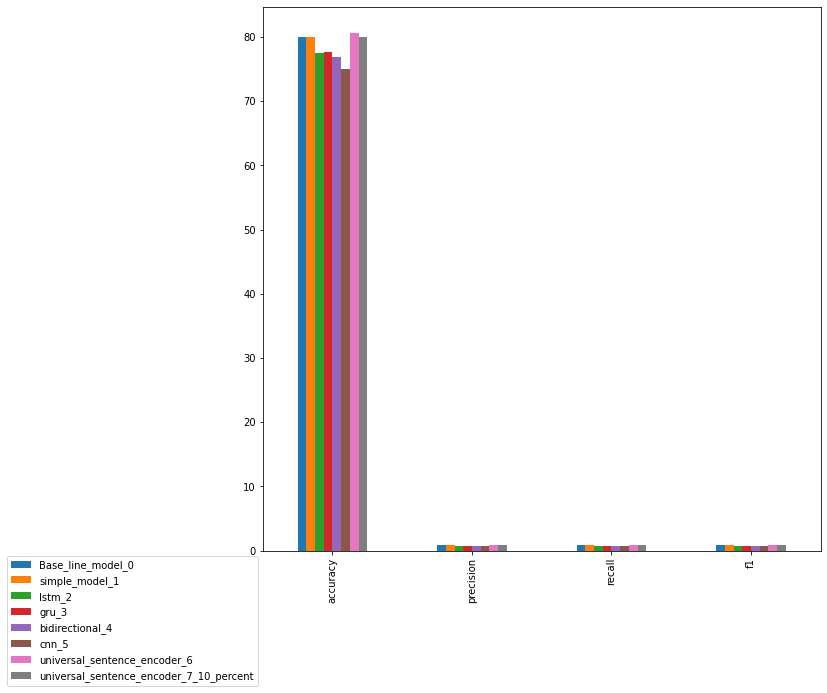

In [ ]:
all_models_compare.plot(kind="bar"  , figsize=(10,10)).legend(bbox_to_anchor=(0,0));

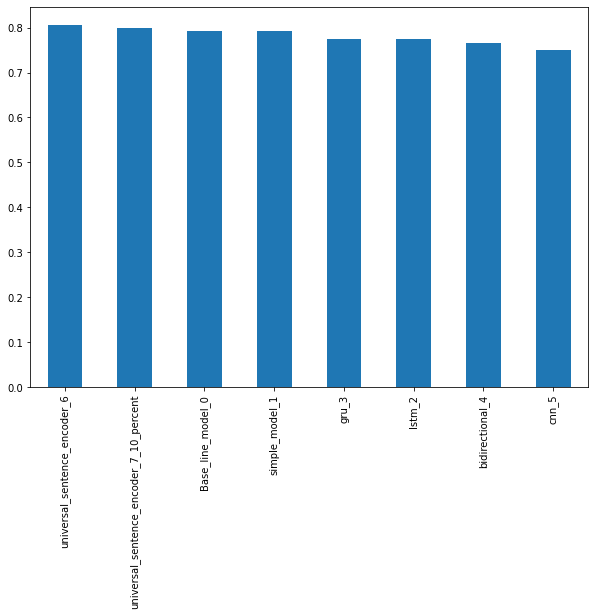

In [ ]:


all_models_comapare.sort_values("f1",ascending=False)["f1"].plot(kind="bar",figsize=(10,7))

In [ ]:
!tensorboard dev upload --logdir ./model_logs/ \
--one_shot 

2022-07-08 12:52:31.735836: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/main.py", line 46, in run_main
  File "/usr/local/lib/

In [ ]:

 !tensorboard dev list                                                                             

2022-07-07 14:28:57.122749: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
https://tensorboard.dev/experiment/3IRz7Py2Rfa908T8kKAbMg/
	Name                 [No Name]
	Description          [No Description]
	Id                   3IRz7Py2Rfa908T8kKAbMg
	Created              2022-07-07 14:04:35 (24 minutes ago)
	Updated              2022-07-07 14:04:42 (24 minutes ago)
	Runs                 14
	Tags                 5
	Scalars              210
	Tensor bytes         0
	Binary object bytes  3788348
Total: 1 experiment(s)


In [ ]:
model_7.summary()

Model: "model_6_use"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_10 (Dense)            (None, 64)                32832     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
#saving the model in the tensorflow
model_7.save("model_7.h5")

In [ ]:
import tensorflow_hub as hub
loaded_model_7=tf.keras.models.load_model("model_7.h5",
                                          custom_objects={"KerasLayer": hub.KerasLayer})

In [ ]:
loaded_model_7.evaluate(val_sentences,val_labels)

48/48 [==============================] - 2s 21ms/step - loss: 0.4377 - accuracy: 0.8063


[0.43772056698799133, 0.8063033223152161]

In [ ]:
#saved model format
model_7.save("model_7_savedFormat")

INFO:tensorflow:Assets written to: model_7_savedFormat/assets


INFO:tensorflow:Assets written to: model_7_savedFormat/assets


In [ ]:
savedmodelLoading=tf.keras.models.load_model("model_7_savedFormat")

In [ ]:
savedmodelLoading.evaluate(val_sentences,val_labels)

48/48 [==============================] - 2s 23ms/step - loss: 0.4377 - accuracy: 0.8063


[0.43772056698799133, 0.8063033223152161]

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2022-07-08 13:22:07--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M   149MB/s    in 7.4s    

2022-07-08 13:22:15 (123 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.inde

In [ ]:
model_7_pretrained=tf.keras.models.load_model("08_model_6_USE_feature_extractor")

In [ ]:
model_7_pretrained.evaluate(val_sentences,val_labels)

48/48 [==============================] - 2s 20ms/step - loss: 0.4099 - accuracy: 0.8201


[0.4099445044994354, 0.8200919032096863]

In [ ]:
#make some predictions with the loaded model from the google storage
model_7_pretrained_pred=model_7_pretrained.predict(val_sentences)
model_7_pretrained_pred_probs=tf.squeeze(tf.round(model_7_pretrained_pred))

In [ ]:
model_7_pretrained_pred_probs[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
val_d=pd.DataFrame({"text": val_sentences,
                    "target": val_labels,
                    "pred_prob": model_7_pretrained_pred_probs,
                    "pred": tf.squeeze(model_7_pretrained_pred)})

In [ ]:
val_d.head()

,text,target,pred_prob,pred
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [ ]:
#finding the most wrong predictions
most_wrong=val_d[val_d["target"] != val_d["pred_prob"]].sort_values("pred",ascending=False)

In [ ]:
most_wrong.head()

,text,target,pred_prob,pred
881,@adorableappple No reported flooding po in the...,0,1.0,0.970023
1307,We should all have a fire safety plan. RT @Mat...,0,1.0,0.939019
846,Mourning notices for stabbing arson victims st...,0,1.0,0.938105
1502,Two Jewish Terrorists Charged In Historic-Chur...,0,1.0,0.918810
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196


In [ ]:
for row in most_wrong[:10].itertuples():
  _,text,target,pred_prob,pred = row
  print(f"Target:{target},Pred_prob:{pred_prob},Pred:{pred}")
  print(f"Text:/n{text}/n")
  print("----/n")

Target:0,Pred_prob:1.0,Pred:0.9700231552124023
Text:/n@adorableappple No reported flooding po in the area. Ten-4. #mmda/n
----/n
Target:0,Pred_prob:1.0,Pred:0.9390192627906799
Text:/nWe should all have a fire safety plan. RT @Matt_Kroschel: MOCK WILDFIRE near #Vail as agencies prepare for the worst. http://t.co/SWwyLRk0fv/n
----/n
Target:0,Pred_prob:1.0,Pred:0.9381048679351807
Text:/nMourning notices for stabbing arson victims stir Û÷politics of griefÛª in Israel: Posters for Shira Banki and A... http://t.co/3GZ5zQQTHe/n
----/n
Target:0,Pred_prob:1.0,Pred:0.9188095331192017
Text:/nTwo Jewish Terrorists Charged In Historic-Church Arson | The Ugly Truth http://t.co/iEksNFSbY7 http://t.co/VWCf3slkrW/n
----/n
Target:0,Pred_prob:1.0,Pred:0.9101957082748413
Text:/n? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying/n
----/n
Target:0,Pred_prob:1.0,Pred:0.8769820928573608
Text:/nFedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lH

In [ ]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [ ]:
text_sentences=test_df["text"].to_list()
test_samples=random.sample(text_sentences,10)
for test_sample in test_samples:
  pred_probs=tf.squeeze(model_7_pretrained.predict([test_sample]))
  pred=tf.round(pred_probs)
  print(f"Pred:{int(pred)}, Probs :{pred_probs}")
  print(f"Text :\n{text_sample}\n")




Pred:1, Probs :0.9101958274841309
Text :
@skydragonforce ^^why i usually never try to express opinions for fear of the hate ._.

Pred:1, Probs :0.6574796438217163
Text :
@skydragonforce ^^why i usually never try to express opinions for fear of the hate ._.

Pred:0, Probs :0.16330260038375854
Text :
@skydragonforce ^^why i usually never try to express opinions for fear of the hate ._.

Pred:0, Probs :0.08293896913528442
Text :
@skydragonforce ^^why i usually never try to express opinions for fear of the hate ._.

Pred:1, Probs :0.8149272799491882
Text :
@skydragonforce ^^why i usually never try to express opinions for fear of the hate ._.

Pred:0, Probs :0.1574963927268982
Text :
@skydragonforce ^^why i usually never try to express opinions for fear of the hate ._.

Pred:0, Probs :0.27308768033981323
Text :
@skydragonforce ^^why i usually never try to express opinions for fear of the hate ._.

Pred:1, Probs :0.9063320755958557
Text :
@skydragonforce ^^why i usually never try to express 